# Building books recommendation system (Item-Item correlation)

In [535]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.metrics.pairwise import cosine_similarity

In [536]:
warnings.filterwarnings('ignore')

## Load the datasets

In [537]:
bookRatings = pd.read_csv('BookRatings.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [538]:
books = pd.read_csv('Books.csv', sep=';',error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [539]:
users = pd.read_csv('Users.csv', sep=';',error_bad_lines=False, encoding='latin-1')

## Data Exploration

In [540]:
bookRatings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [541]:
bookRatings.shape

(1149780, 3)

In [542]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [543]:
books.shape

(271360, 8)

In [544]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [545]:
users.shape

(278858, 3)

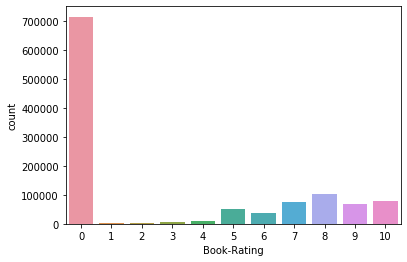

In [546]:
# Count plot to understand the count of ratings
sns.countplot(x='Book-Rating', data=bookRatings)

## Recommendation based on frequently rated books

In [547]:
# Group by 'ISBN' and calculate the rating for each book
rating_count = pd.DataFrame(bookRatings.groupby('ISBN')['Book-Rating'].count())

In [548]:
rating_count.sort_values('Book-Rating', ascending = False).head()

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


The book with ISBN '0971880107' has highest ratings

In [549]:
freq_rated_books_df = rating_count.sort_values('Book-Rating', ascending = False).head()
freq_rated_books_df.index

Index(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], dtype='object', name='ISBN')

In [550]:
freq_rated_books = pd.DataFrame(freq_rated_books_df.index, index=np.arange(5), columns = ['ISBN'])
freq_rated_books

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [551]:
# Below are the top 5 frequently rated books
freq_rated_books_summary = pd.merge(freq_rated_books, books, on='ISBN')
freq_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [552]:
# Analyzing mean rating of the frequently rated books

In [553]:
average_rating = pd.DataFrame(bookRatings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(bookRatings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


### We can see that, books that received most ratings afterall received lower ratings. Hence we cannot rely on the count of ratings to recommend books.

## Building recommendation model using item-item correlation

In [554]:
# Consider ratings only of users and rating of books that are present in Users.csv and books.csv respectively

In [555]:
# ratings_new has only the books that are in the books table
ratings_new = bookRatings[bookRatings['ISBN'].isin(books['ISBN'])]
# now ratings_new has only the users that are in users table
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]

In [556]:
# The values of 'count_user' has the count of unique users
count_user = ratings_new['User-ID'].value_counts()
count_user

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
169742        1
159878        1
266314        1
157456        1
262234        1
Name: User-ID, Length: 92106, dtype: int64

In [557]:
# Fetching only the users who have rated bookes atleast 20 times
ratings_new = ratings_new[ratings_new['User-ID'].isin(count_user[count_user >= 20].index)]

In [558]:
# The values of 'count_books' has the count of each unique books that have been rated
count_books = ratings_new['ISBN'].value_counts()
count_books

0971880107    1125
0316666343     735
0385504209     547
0060928336     471
0312195516     425
              ... 
0553441558       1
0671007165       1
0671741225       1
079382155X       1
0813104025       1
Name: ISBN, Length: 237689, dtype: int64

In [559]:
# Fetching only the books that have been rated atleast 50 times by readers
ratings_new = ratings_new[ratings_new['ISBN'].isin(count_books[count_books >= 50].index)]

In [560]:
ratings_new

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
413,276925,002542730X,10
426,276925,0316666343,0
429,276925,0385504209,8
453,276925,0804106304,0
...,...,...,...
1149712,276688,0553569155,0
1149714,276688,0553575090,7
1149715,276688,0553575104,6
1149726,276688,0679751521,0


Forming a Rating Matrix

In [561]:
ratings_matrix = ratings_new.pivot(index = 'User-ID', columns= 'ISBN', values='Book-Rating' )
ratings_matrix.shape

(6166, 1426)

In [562]:
ratings_matrix.head()

ISBN,000649840X,002026478X,002542730X,0028604199,0060008032,0060085444,0060096195,006016848X,0060173289,0060175400,...,1573225789,1573227331,1573229326,1573229571,1573229725,1576737330,1592400876,1878424319,1885171080,1931561648
User-ID,,,,,,,,,,,,,,,,,,,,,
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [563]:
# Calculating the correlation between books
ratings_matrix_corr = ratings_matrix.corr(method='pearson')
ratings_matrix_corr

ISBN,000649840X,002026478X,002542730X,0028604199,0060008032,0060085444,0060096195,006016848X,0060173289,0060175400,...,1573225789,1573227331,1573229326,1573229571,1573229725,1576737330,1592400876,1878424319,1885171080,1931561648
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,1.000000,NaN,-0.816638,-0.574801,-0.500000,NaN,NaN,0.995177,NaN,0.500000,...,0.792076,NaN,0.232767,0.577350,0.158300,NaN,0.677908,0.720577,NaN,1.000000
002026478X,NaN,1.0,NaN,NaN,NaN,NaN,0.866025,NaN,NaN,1.000000,...,NaN,-0.500000,-0.217025,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
002542730X,-0.816638,NaN,1.000000,0.470804,0.202168,-0.250000,-0.220824,0.033192,NaN,0.727161,...,0.333592,0.917663,0.574714,0.681684,NaN,0.669505,0.298373,-0.333333,NaN,NaN
0028604199,-0.574801,NaN,0.470804,1.000000,NaN,NaN,1.000000,-0.240192,NaN,1.000000,...,NaN,NaN,0.500000,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN
0060008032,-0.500000,NaN,0.202168,NaN,1.000000,0.149071,0.448652,0.242532,NaN,1.000000,...,0.424645,1.000000,0.413376,0.000000,NaN,NaN,0.529813,NaN,-0.166924,0.099668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576737330,NaN,NaN,0.669505,1.000000,NaN,NaN,NaN,-0.200000,NaN,-1.000000,...,NaN,NaN,NaN,NaN,1.000000,1.000000,0.636364,NaN,NaN,NaN
1592400876,0.677908,1.0,0.298373,NaN,0.529813,-1.000000,-0.744210,0.219939,-0.407309,0.498814,...,0.482904,0.515152,0.638837,-0.792406,0.417786,0.636364,1.000000,-0.575758,NaN,0.420084
1878424319,0.720577,NaN,-0.333333,NaN,NaN,NaN,NaN,0.801325,NaN,NaN,...,0.598869,NaN,-0.315179,-0.333333,NaN,NaN,-0.575758,1.000000,0.173731,-0.575758


In [564]:
# Picking one reader from the dataset

In [565]:
ratings_matrix.loc[243]

ISBN
000649840X   NaN
002026478X   NaN
002542730X   NaN
0028604199   NaN
0060008032   NaN
              ..
1576737330   NaN
1592400876   NaN
1878424319   NaN
1885171080   NaN
1931561648   NaN
Name: 243, Length: 1426, dtype: float64

In [566]:
readerRatings_list = ratings_matrix.loc[243].dropna()
top10_readerrated = readerRatings_list.sort_values(ascending=False).head(10)
top10_readerrated

ISBN
0060915544    10.0
0375400117    10.0
0446364800     9.0
0316601950     9.0
0316776963     9.0
0425163407     9.0
0316899984     7.0
044023722X     7.0
0385720106     7.0
0060977493     7.0
Name: 243, dtype: float64

In [567]:
# Below are the top 10 books rated by the user[243]
readerRated_books = pd.DataFrame(top10_readerrated.index, 
                                  index=np.arange(10), columns=['ISBN'])
readerBooksList = pd.merge(readerRated_books, books, on='ISBN')
readerBooksList

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0060915544,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...,http://images.amazon.com/images/P/0060915544.0...
1,0375400117,Memoirs of a Geisha,Arthur Golden,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0375400117.0...,http://images.amazon.com/images/P/0375400117.0...,http://images.amazon.com/images/P/0375400117.0...
2,0446364800,The General's Daughter,Nelson DeMille,1993,Warner Books,http://images.amazon.com/images/P/0446364800.0...,http://images.amazon.com/images/P/0446364800.0...,http://images.amazon.com/images/P/0446364800.0...
3,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
4,0316776963,Me Talk Pretty One Day,David Sedaris,2001,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...
5,0425163407,Unnatural Exposure,Patricia Daniels Cornwell,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...
6,0316899984,"River, Cross My Heart",Breena Clarke,1999,Little Brown &amp; Company,http://images.amazon.com/images/P/0316899984.0...,http://images.amazon.com/images/P/0316899984.0...,http://images.amazon.com/images/P/0316899984.0...
7,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
8,0385720106,A Map of the World,Jane Hamilton,1999,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385720106.0...,http://images.amazon.com/images/P/0385720106.0...,http://images.amazon.com/images/P/0385720106.0...
9,0060977493,The God of Small Things,Arundhati Roy,1998,Perennial,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...


In [568]:
# Steps to identify similar books for the reader

In [569]:
# An empty series to append the recommended similar books
similarReader = pd.Series()

# Looping through every book of the reader to identify correlated books
for item in range(0, len(readerRatings_list.index)):
   
    # 'simReader' consists of book id's that are in correlation with the reader rated books
    simReader = ratings_matrix_corr[readerRatings_list.index[item]].dropna()
    
    # Scaling the similarity based on the ratings provided by the reader
    simReader = simReader.map(lambda x: x * readerRatings_list[item])
    
    # Adding the identified book Id's and its corresponding score to the above empty series
    similarReader = similarReader.append(simReader)

In [570]:
similarReader.sort_values(inplace = True, ascending = False)
top5_correlated = similarReader.head(5)
top5_correlated

0553213164    10.0
0312961324    10.0
0679731148    10.0
042518630X    10.0
0440236738    10.0
dtype: float64

In [571]:
# Below books are recommended based on the user's rating

In [572]:
books_corr = pd.DataFrame(top5_correlated.index , 
                                  index=np.arange(5), columns=['ISBN'])
corr_books = pd.merge(books_corr, books, on='ISBN')
corr_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0553213164,Anne of Windy Poplars (Anne of Green Gables No...,L.M. MONTGOMERY,1983,Bantam Classics,http://images.amazon.com/images/P/0553213164.0...,http://images.amazon.com/images/P/0553213164.0...,http://images.amazon.com/images/P/0553213164.0...
1,0312961324,The Shell Seekers (Shell Seekers),Rosamunde Pilcher,1997,St. Martin's Press,http://images.amazon.com/images/P/0312961324.0...,http://images.amazon.com/images/P/0312961324.0...,http://images.amazon.com/images/P/0312961324.0...
2,0679731148,A Year in Provence,Peter Mayle,1991,Vintage Books USA,http://images.amazon.com/images/P/0679731148.0...,http://images.amazon.com/images/P/0679731148.0...,http://images.amazon.com/images/P/0679731148.0...
3,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...
4,0440236738,Gone for Good,HARLAN COBEN,2003,Dell,http://images.amazon.com/images/P/0440236738.0...,http://images.amazon.com/images/P/0440236738.0...,http://images.amazon.com/images/P/0440236738.0...
